In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#Путь до файла
train_root_path = 'gdrive/My Drive/Samsung/Cleandataset.csv'

Mounted at /content/gdrive


In [3]:
import pandas as pd
import copy

df_all = pd.read_csv(train_root_path, delimiter=',')
df_all = df_all.drop(columns='Unnamed: 0')

display(df_all)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,0.919065,0.650257,0.469535,0.287707,0.097682,0.069675,0.028445,0.030572,0.033647,0.023890,0.025291,0.013475,0.005173,0.013391,0.013904,1.0,0.358702,0.201273,0.163893,0.164775,0.129281,0.078793,0.096696,0.100589,0.073530,0.071841,0.065595,0.058716,0.051687,0.046135,0.920088,0.644407,0.418637,0.269873,0.131582,0.040953,0.028544,0.024784,0.027026,0.026795,...,0.051223,0.003361,0.027269,0.027983,0.008306,0.010127,0.002712,0.001493,0.002746,0.975475,0.372203,0.316960,0.146690,0.202303,0.206555,0.147620,0.097858,0.062976,0.060446,0.076456,0.069136,0.058767,0.054906,0.048649,0.896665,0.490952,0.217077,0.231527,0.061750,0.084577,0.095159,0.072771,0.058124,0.066473,0.063071,0.039538,0.043138,0.039108,0.035735,0
1,0.915002,0.664978,0.478112,0.274082,0.095502,0.058711,0.023298,0.027736,0.028032,0.025431,0.021178,0.013196,0.003483,0.012445,0.012988,1.0,0.243341,0.298414,0.092631,0.168008,0.191382,0.087039,0.080576,0.073913,0.052801,0.061661,0.059038,0.047716,0.045699,0.040155,0.881959,0.574133,0.395904,0.250844,0.118890,0.013310,0.029777,0.026283,0.019439,0.021854,...,0.029523,0.041869,0.027892,0.036082,0.018095,0.013192,0.009530,0.003619,0.003055,0.876196,0.391272,0.148763,0.131287,0.138010,0.154130,0.108209,0.082342,0.065143,0.051954,0.074370,0.052813,0.048615,0.042821,0.038479,0.903681,0.360614,0.227646,0.227590,0.073292,0.070500,0.073496,0.063072,0.059083,0.057461,0.053498,0.034443,0.036691,0.034266,0.030975,0
2,0.943298,0.675661,0.431299,0.283745,0.129874,0.030283,0.041025,0.038935,0.024721,0.032911,0.028920,0.013289,0.009978,0.016295,0.016724,1.0,0.380452,0.284481,0.145987,0.112287,0.197111,0.087438,0.107655,0.110238,0.085796,0.081121,0.069826,0.059979,0.056378,0.049435,0.886547,0.604982,0.376888,0.223514,0.111099,0.019234,0.033270,0.024021,0.022815,0.033004,...,0.097432,0.023055,0.022176,0.018670,0.034012,0.011156,0.012749,0.013620,0.012517,0.980913,0.334299,0.090223,0.137487,0.062747,0.152528,0.125570,0.064862,0.021662,0.036650,0.052242,0.040111,0.039799,0.034372,0.030491,0.846019,0.289782,0.267373,0.210917,0.074602,0.110689,0.105146,0.077540,0.062882,0.059446,0.066245,0.043524,0.043970,0.041461,0.036734,0
3,0.854656,0.603789,0.456104,0.267079,0.133675,0.044407,0.040785,0.030659,0.028377,0.026722,0.026608,0.010389,0.006372,0.014330,0.014404,1.0,0.308120,0.269852,0.167549,0.166645,0.151604,0.110029,0.081609,0.067277,0.058275,0.073228,0.055140,0.051566,0.045756,0.041036,0.847668,0.562572,0.384846,0.247665,0.155914,0.029983,0.032918,0.024212,0.013363,0.029646,...,0.086952,0.036694,0.044077,0.016316,0.005736,0.010905,0.004023,0.000287,0.001642,0.875650,0.390352,0.154195,0.147036,0.074065,0.151157,0.136115,0.076067,0.041733,0.063205,0.069618,0.051473,0.048205,0.042520,0.038507,1.000000,0.322991,0.195277,0.214128,0.187586,0.062040,0.074257,0.062253,0.058276,0.053981,0.037465,0.036705,0.037930,0.034836,0.031074,0
4,0.814520,0.591758,0.413791,0.251815,0.068042,0.056686,0.021467,0.020842,0.028796,0.018224,0.019638,0.013172,0.002268,0.009893,0.010730,1.0,0.365445,0.249725,0.091292,0.211286,0.115724,0.113347,0.079776,0.049668,0.056146,0.054650,0.054928,0.045858,0.041434,0.037391,0.811265,0.530117,0.356726,0.222837,0.136568,0.023882,0.009906,0.013480,0.007823,0.015785,...,0.034105,0.025904,0.017772,0.031359,0.011740,0.007096,0.004237,0.000871,0.001703,0.765202,0.318394,0.172882,0.108835,0.143863,0.118301,0.134073,0.053285,0.015003,0.043379,0.044619,0.040533,0.036008,0.032799,0.029533,0.776019,0.351533,0.258483,0.217385,0.083344,0.086232,0.090894,0.069485,0.055842,0.062890,0.060361,0.039716,0.040777,0.038231,0.034251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
Y = df_all['135']
del df_all['135']
X = df_all

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=7) # split in to parts X_train, X_test, y_train, y_test

In [45]:
# Тренировочный датасет
print(x_train)
print(y_train)

             0         1         2  ...       132       133       134
894   0.313904  0.105485  0.052416  ...  0.008995  0.010944  0.009983
227   0.269050  0.028045  0.015308  ...  0.000973  0.000139  0.000422
1470  0.373798  0.048124  0.072961  ...  0.001191  0.001547  0.001238
126   0.821921  0.614790  0.418727  ...  0.040251  0.038619  0.034508
405   1.000000  0.677827  0.432509  ...  0.002105  0.004226  0.005030
...        ...       ...       ...  ...       ...       ...       ...
211   0.841251  0.629961  0.467086  ...  0.052325  0.047096  0.041949
502   0.422299  0.237827  0.098854  ...  0.006210  0.007807  0.005994
537   0.321938  0.100083  0.081677  ...  0.004663  0.004718  0.004123
1220  0.463604  0.240081  0.147281  ...  0.003136  0.003942  0.004111
175   1.000000  0.664662  0.351379  ...  0.022719  0.021745  0.020329

[314 rows x 135 columns]
894     4
227     1
1470    6
126     0
405     2
       ..
211     0
502     2
537     2
1220    5
175     0
Name: 135, Length: 314, 

In [46]:
# Тестовый датасет
print(x_test)
print(y_test)

             0         1         2  ...       132       133       134
925   0.434200  0.221268  0.170205  ...  0.014692  0.015982  0.014901
1089  0.502287  0.212179  0.171342  ...  0.008491  0.001307  0.000319
378   0.816059  0.573961  0.439730  ...  0.009394  0.010915  0.011125
1501  0.390160  0.076642  0.109861  ...  0.000931  0.000444  0.000190
506   0.487768  0.199808  0.072291  ...  0.004176  0.001704  0.001474
...        ...       ...       ...  ...       ...       ...       ...
1459  0.417055  0.102538  0.120563  ...  0.000615  0.000698  0.000516
719   0.760357  0.409546  0.240038  ...  0.014231  0.010570  0.010558
884   0.420209  0.197168  0.148935  ...  0.009869  0.012765  0.011607
776   0.693773  0.307999  0.204943  ...  0.022205  0.018671  0.016806
849   0.674884  0.315653  0.290611  ...  0.016758  0.019507  0.018268

[1259 rows x 135 columns]
925     4
1089    5
378     2
1501    6
506     2
       ..
1459    6
719     3
884     4
776     4
849     4
Name: 135, Length: 1259

In [47]:
#Переводим DataFrame в тензоры
X_train = torch.tensor(x_train.values)
Y_train = torch.tensor(y_train.values)

X_test = torch.tensor(x_test.values)
Y_test = torch.tensor(y_test.values)

In [48]:
#Тренировочный датасет
print(X_train.shape)
print(X_train)
print(Y_train.shape)
print(Y_train)

torch.Size([314, 135])
tensor([[3.1390e-01, 1.0548e-01, 5.2416e-02,  ..., 8.9946e-03, 1.0944e-02,
         9.9825e-03],
        [2.6905e-01, 2.8045e-02, 1.5308e-02,  ..., 9.7283e-04, 1.3858e-04,
         4.2246e-04],
        [3.7380e-01, 4.8124e-02, 7.2961e-02,  ..., 1.1912e-03, 1.5472e-03,
         1.2385e-03],
        ...,
        [3.2194e-01, 1.0008e-01, 8.1677e-02,  ..., 4.6632e-03, 4.7184e-03,
         4.1227e-03],
        [4.6360e-01, 2.4008e-01, 1.4728e-01,  ..., 3.1357e-03, 3.9423e-03,
         4.1110e-03],
        [1.0000e+00, 6.6466e-01, 3.5138e-01,  ..., 2.2719e-02, 2.1745e-02,
         2.0329e-02]], dtype=torch.float64)
torch.Size([314])
tensor([4, 1, 6, 0, 2, 4, 4, 3, 6, 5, 5, 1, 1, 2, 0, 4, 5, 4, 3, 4, 5, 2, 2, 5,
        5, 5, 1, 3, 0, 3, 0, 3, 6, 5, 2, 5, 0, 5, 6, 4, 0, 1, 5, 4, 5, 4, 5, 0,
        6, 5, 0, 0, 3, 5, 1, 2, 4, 5, 6, 6, 0, 0, 2, 4, 2, 5, 2, 2, 0, 5, 6, 3,
        6, 6, 6, 5, 5, 5, 5, 5, 6, 4, 2, 4, 3, 6, 6, 2, 2, 6, 6, 0, 4, 5, 0, 0,
        4, 3, 0, 5, 2,

In [49]:
#Тестовый датасет
print(X_test.shape)
print(X_test)
print(Y_test.shape)
print(Y_test)

torch.Size([1259, 135])
tensor([[4.3420e-01, 2.2127e-01, 1.7021e-01,  ..., 1.4692e-02, 1.5982e-02,
         1.4901e-02],
        [5.0229e-01, 2.1218e-01, 1.7134e-01,  ..., 8.4913e-03, 1.3067e-03,
         3.1901e-04],
        [8.1606e-01, 5.7396e-01, 4.3973e-01,  ..., 9.3939e-03, 1.0915e-02,
         1.1125e-02],
        ...,
        [4.2021e-01, 1.9717e-01, 1.4894e-01,  ..., 9.8694e-03, 1.2765e-02,
         1.1607e-02],
        [6.9377e-01, 3.0800e-01, 2.0494e-01,  ..., 2.2205e-02, 1.8671e-02,
         1.6806e-02],
        [6.7488e-01, 3.1565e-01, 2.9061e-01,  ..., 1.6758e-02, 1.9507e-02,
         1.8268e-02]], dtype=torch.float64)
torch.Size([1259])
tensor([4, 5, 2,  ..., 4, 4, 4])


In [50]:
# Увелчиваем размерность
X_train = X_train.unsqueeze(1).float()
print(X_train.shape)

X_test = X_test.unsqueeze(1).float()
print(X_test.shape)

torch.Size([314, 1, 135])
torch.Size([1259, 1, 135])


In [51]:
X_train = X_train.view(X_train.shape[0],3,3,15)
print(X_train.shape)
print(X_train)

torch.Size([314, 3, 3, 15])
tensor([[[[3.1390e-01, 1.0548e-01, 5.2416e-02,  ..., 2.0124e-03,
           4.6344e-04, 3.5753e-04],
          [5.9661e-01, 3.8199e-01, 3.2411e-01,  ..., 8.0965e-03,
           2.8621e-03, 1.9472e-03],
          [1.0000e+00, 7.4241e-01, 6.3668e-01,  ..., 1.2795e-02,
           9.7573e-03, 9.0082e-03]],

         [[1.0000e+00, 8.2013e-01, 7.5965e-01,  ..., 2.9294e-01,
           2.5361e-01, 2.1972e-01],
          [6.0086e-01, 5.1277e-01, 4.6519e-01,  ..., 6.3703e-02,
           5.9248e-02, 5.1856e-02],
          [3.7714e-01, 3.0345e-01, 2.7164e-01,  ..., 3.9014e-02,
           3.6260e-02, 3.1710e-02]],

         [[5.2176e-01, 1.4095e-01, 1.6191e-01,  ..., 4.5264e-02,
           4.1156e-02, 3.6049e-02],
          [1.0000e+00, 6.3095e-01, 4.5636e-01,  ..., 1.3988e-02,
           4.1727e-03, 4.4373e-04],
          [4.4980e-01, 2.3435e-01, 2.2724e-01,  ..., 8.9946e-03,
           1.0944e-02, 9.9825e-03]]],


        [[[2.6905e-01, 2.8045e-02, 1.5308e-02,  ..., 3.

In [52]:
X_test= X_test.view(X_test.shape[0],3,3,15)
print(X_test.shape)
print(X_test)

torch.Size([1259, 3, 3, 15])
tensor([[[[4.3420e-01, 2.2127e-01, 1.7021e-01,  ..., 3.5738e-03,
           1.3850e-03, 1.5552e-03],
          [6.4781e-01, 4.0941e-01, 2.9885e-01,  ..., 7.2033e-03,
           2.4608e-03, 2.2408e-03],
          [1.0000e+00, 7.6110e-01, 6.9522e-01,  ..., 2.2604e-02,
           6.1598e-03, 1.0845e-03]],

         [[1.0000e+00, 8.1758e-01, 7.4968e-01,  ..., 3.0703e-01,
           2.6527e-01, 2.2981e-01],
          [6.0635e-01, 5.2747e-01, 4.7273e-01,  ..., 2.0252e-02,
           2.2648e-02, 2.0275e-02],
          [5.0565e-01, 4.0933e-01, 3.5590e-01,  ..., 6.5863e-02,
           6.0129e-02, 5.2531e-02]],

         [[5.3117e-01, 2.3410e-01, 1.4489e-01,  ..., 5.5095e-02,
           4.8551e-02, 4.2892e-02],
          [1.0000e+00, 6.4600e-01, 4.8299e-01,  ..., 1.2014e-02,
           3.6885e-03, 2.2541e-03],
          [5.4706e-01, 3.0370e-01, 2.1800e-01,  ..., 1.4692e-02,
           1.5982e-02, 1.4901e-02]]],


        [[[5.0229e-01, 2.1218e-01, 1.7134e-01,  ..., 8

# **Модели**

In [77]:
class KachekNetV2(torch.nn.Module):
    def __init__(self):
        super(KachekNetV2, self).__init__()

        self.conv11 = torch.nn.Conv2d(in_channels = 3, out_channels = 135, kernel_size = 3, stride = 1, padding = (0,1))
        self.funcAct11 = torch.nn.ReLU()

        self.conv12 = torch.nn.Conv2d(in_channels = 135 ,out_channels = 50, kernel_size = 3 ,stride = 1, padding = 1)
        self.funcAct12 = torch.nn.ReLU()

        self.conv13 = torch.nn.Conv2d(in_channels = 50 ,out_channels = 10, kernel_size = 3 ,stride = 1, padding = 1)
        self.funcAct13 = torch.nn.ReLU()

        self.conv14 = torch.nn.Conv2d(in_channels = 10 ,out_channels = 1, kernel_size = 3 ,stride = 1, padding = 1)
        self.funcAct14 = torch.nn.ReLU()


        self.flat = torch.nn.Flatten()


        self.fc11 = torch.nn.Linear(15, 15)
        self.fc12 = torch.nn.Linear(15, 10)
        self.fc13 = torch.nn.Linear(10, 7)

        self.sm11 = torch.nn.Softmax(dim=1)


    def forward(self,x):

        x = self.conv11(x)
        x = self.funcAct11(x)

        x = self.conv12(x)
        x = self.funcAct12(x)

        x = self.conv13(x)
        x = self.funcAct13(x)

        x = self.conv14(x)
        x = self.funcAct14(x)

        #x+=residual

        x = self.flat(x)

        x = self.fc11(x)
        x = self.fc12(x)
        x = self.fc13(x)

        x = self.sm11(x)

        return x

kachek_net_v2 = KachekNetV2()

In [78]:
class KachekNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
      super(KachekNet,self).__init__()
#==========================================================================================================
      #Первый слой. входной тензор (3,3,15) (3 датчика у которого 3 оси, у каждой по 15 значений), выходной (100,1,13) 
      self.conv11 = torch.nn.Conv2d(in_channels = 3, out_channels = 100, kernel_size = 3, stride = 1, padding = 0 )
      self.funcAct11 = torch.nn.ReLU()

      #Второй слой. входной тензор (1,13,100) выходной (6,4,47)  
      self.conv12 = torch.nn.Conv2d(in_channels = 1 ,out_channels = 6, kernel_size = 7 ,stride = 2, padding = 0)
      self.funcAct12 = torch.nn.ReLU()
      
      #Пулинг размером (4,4) входной вектор (6,4,47), выходной: (6,1,11)
      self.pool12 = torch.nn.MaxPool2d(kernel_size = 4, stride = 4)
   
      #Вытягиваем вектор (6,11,1) в (1,1,66)
      self.flat = torch.nn.Flatten()
      
      #Полносвязный слой 66 входов, 50 выходов
      self.fc11 = torch.nn.Linear(66, n_hidden_neurons)
     
      #Полносвязный слой 55 входов, 7 выходов (количество классов)
      self.fc12 = torch.nn.Linear(n_hidden_neurons, 7) 
     
      #Софтмакс для определения вероятности
      self.sm11 = torch.nn.Softmax(dim=1)
      
#==========================================================================================================
  def forward(self, x):

    x = self.conv11(x)
    x = self.funcAct11(x)
    
    # меняем размерность с (100,1, 13) на (1,13,100)
    x = x.view(-1, 1 ,100, 13)

    x = self.conv12(x)

    x = self.funcAct12(x)
    x = self.pool12(x)
    x = self.flat(x)
    
    x = self.fc11(x)
    x = self.fc12(x)
    
    x = self.sm11(x)
    
    return x
#==========================================================================================================
kachek_net = KachekNet(50)

In [79]:
def train(net, X_train, Y_train, X_test, Y_test, epoch):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr = 1.0e-3)
    
    batch_size = 7

    test_accuracy_history = []
    test_loss_history = []
#
    train_accuracy_history = []
    train_loss_history = []
#
    X_test = X_test.to(device)
    Y_test = Y_test.to(device)

    for epoch in range(epoch):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            
            batch_indexes = order[start_index:start_index+batch_size]
            
            x_batch = X_train[batch_indexes]
            y_batch = Y_train[batch_indexes]
            
            preds = net.forward(x_batch) 
            

            loss_value = loss(preds, y_batch)
            loss_value.backward()
            
            optimizer.step()
        train_accuracy_history.append((preds.argmax(dim=1) == y_batch).float().mean().data.cpu())
        train_loss_history.append(loss_value)

        net.eval()
        test_preds = net.forward(X_test)
        test_loss_history.append(loss(test_preds, Y_test).data.cpu())

        accuracy = (test_preds.argmax(dim=1) == Y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        print(accuracy)
    print('---------------')

    return test_accuracy_history, test_loss_history, train_accuracy_history,  train_loss_history, test_preds


In [81]:
test_accuracy_history, test_loss_history, train_accuracy_history,  train_loss_history, test_preds = train(kachek_net, X_train = X_train, Y_train = Y_train, X_test = X_test, Y_test = Y_test, epoch = 200)

tensor(0.2478)
tensor(0.2478)
tensor(0.5203)
tensor(0.6624)
tensor(0.6624)
tensor(0.6624)
tensor(0.6640)
tensor(0.7832)
tensor(0.7903)
tensor(0.7903)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8562)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.8570)
tensor(0.9285)
tensor(0.9611)
tensor(0.9174)
tensor(0.9913)
tensor(0.9905)
tensor(0.9881)
tensor(0.9976)
tensor(0.9976)
tensor(0.9968)
tensor(0.9984)
tensor(0.9976)
tensor(0.9976)
tensor(0.9976)
tensor(0.9976)
tensor(0.9976)
tensor(0.9976)
tensor(0.9976)
tensor(0.9984)
tensor(0.9976)
tensor(0.9976)
tensor(0.9984)
tensor(0.9976)
tensor(0.9976)
tensor(0.9992)
tensor(0.9992)
tensor(0.9976)
tensor(0.9976)
tensor(0.9976)
tensor(0.9992)
tensor(0.9992)
tensor(0.9992)
tensor(0.9992)
tensor(0.9976)
tensor(0.9976)
tensor(0.9992)
tensor(0.9976)
tensor(0.9992)
tensor(0.9992)
tensor(0.9984)
tensor(0.9992)
tensor(0.9992)
tensor(0.9992)
tensor(0.9

In [80]:
test_accuracy_history, test_loss_history, train_accuracy_history,  train_loss_history, test_preds = train(kachek_net_v2, X_train = X_train, Y_train = Y_train, X_test = X_test, Y_test = Y_test, epoch = 130)

tensor(0.2478)
tensor(0.2478)
tensor(0.2478)
tensor(0.3884)
tensor(0.3884)
tensor(0.5298)
tensor(0.5973)
tensor(0.6497)
tensor(0.6577)
tensor(0.6593)
tensor(0.6569)
tensor(0.6450)
tensor(0.6537)
tensor(0.6616)
tensor(0.6640)
tensor(0.6664)
tensor(0.6600)
tensor(0.6648)
tensor(0.6624)
tensor(0.6807)
tensor(0.5679)
tensor(0.7014)
tensor(0.7061)
tensor(0.6521)
tensor(0.7530)
tensor(0.6219)
tensor(0.6481)
tensor(0.7816)
tensor(0.7935)
tensor(0.7871)
tensor(0.7967)
tensor(0.7522)
tensor(0.7855)
tensor(0.7800)
tensor(0.8356)
tensor(0.8340)
tensor(0.8403)
tensor(0.8396)
tensor(0.8411)
tensor(0.8332)
tensor(0.8435)
tensor(0.8348)
tensor(0.8364)
tensor(0.8348)
tensor(0.8419)
tensor(0.8427)
tensor(0.8443)
tensor(0.8435)
tensor(0.8427)
tensor(0.8435)
tensor(0.8427)
tensor(0.8427)
tensor(0.8435)
tensor(0.8253)
tensor(0.8411)
tensor(0.7712)
tensor(0.8745)
tensor(0.8499)
tensor(0.9333)
tensor(0.9492)
tensor(0.9698)
tensor(0.9841)
tensor(0.9833)
tensor(0.9809)
tensor(0.9825)
tensor(0.9841)
tensor(0.9

No handles with labels found to put in legend.


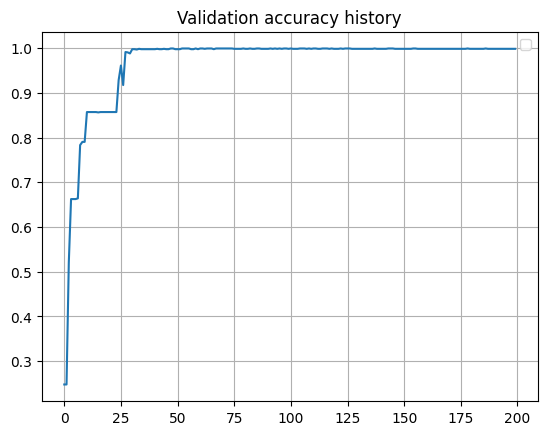

No handles with labels found to put in legend.


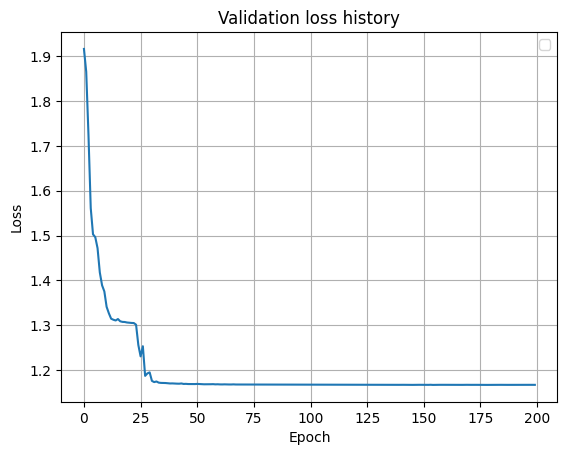

No handles with labels found to put in legend.


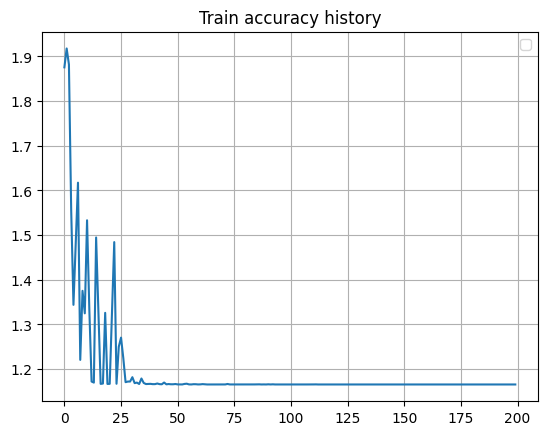

No handles with labels found to put in legend.


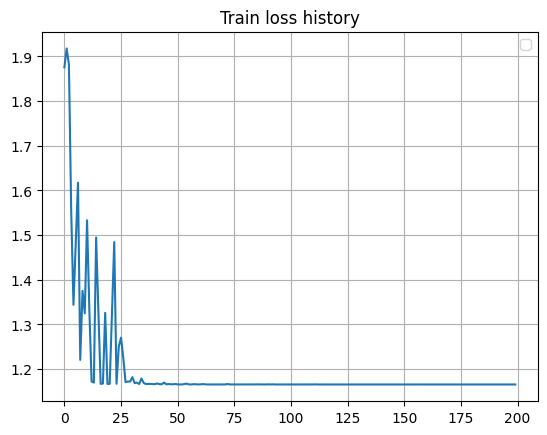

In [82]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.plot(test_accuracy_history)
plt.legend()
plt.title('Validation accuracy history');
plt.grid()
plt.show()

plt.plot(test_loss_history)
plt.legend()
plt.title('Validation loss history');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.plot(train_loss_history)
plt.legend()
plt.title('Train accuracy history');
plt.grid()
plt.show()

plt.plot(train_loss_history)
plt.legend()
plt.title('Train loss history');
plt.grid()
plt.show()

# Анализ результатов тестового набора

Взглянем на вектор предсказаний для тестового набора упражнений. Вектор каждого упражнения состоит из вероятностей того, что то или иное упражнение было выполнено. При этом если было выполнено какое-либо упражнение, то вероятность этого события равна 1 и она же равна сумме всех значений вектора вероятностей для текущего упражнения. Чем ближе упражнение к желаемому, тем выше его вероятность. Если упражнение не соответствует ни одному из известных, то вероятности распределяются между всеми значениями и ярко выраженного максимума не наблюдается.

In [83]:
test_preds_np = test_preds.detach().numpy() # далее удобнее будет работать с numpy массивами

Найдем вероятности тех упражнений, которые мы считаем выполненными, то есть макссимальные вероятности в каждом векторе упражнения и переведем их в датафрейм для удобного анализа.

In [84]:
test_preds_np = np.amax(test_preds_np, axis = 1)
df = pd.DataFrame(test_preds_np)

Проверяем в тестовом наборе вероятности правильных упражнений, которые выше заданного порога.

In [85]:
def probability(p,df):
    print('Вероятность того, что значение выше',p,':')
    print('p(>',p,') = ',(df[0] > p).value_counts()[1]/df.size)
    print()
    print((df[0] > p).value_counts())
    print('Total',df.size)
    print()

Рассмотрим разные значения порога

In [86]:
probability(p = 0.0, df = df)
probability(p = 0.8, df = df)
probability(p = 0.85, df = df)
probability(p = 0.90, df = df)
probability(p = 0.95, df = df)
probability(p = 0.99, df = df)

Вероятность того, что значение выше 0.0 :
p(> 0.0 ) =  1.0

True    1259
Name: 0, dtype: int64
Total 1259

Вероятность того, что значение выше 0.8 :
p(> 0.8 ) =  0.9992057188244639

True     1258
False       1
Name: 0, dtype: int64
Total 1259

Вероятность того, что значение выше 0.85 :
p(> 0.85 ) =  0.9992057188244639

True     1258
False       1
Name: 0, dtype: int64
Total 1259

Вероятность того, что значение выше 0.9 :
p(> 0.9 ) =  0.9984114376489277

True     1257
False       2
Name: 0, dtype: int64
Total 1259

Вероятность того, что значение выше 0.95 :
p(> 0.95 ) =  0.9976171564733916

True     1256
False       3
Name: 0, dtype: int64
Total 1259

Вероятность того, что значение выше 0.99 :
p(> 0.99 ) =  0.9952343129467831

True     1253
False       6
Name: 0, dtype: int64
Total 1259



Видно, что чем выше порог, тем более "правильные" упражнения мы выбираем. В данном контексте под правильными имеются ввиду упражнения, вероятность которых среди всех остальных в рамках данного повторения выше заданного порога. В итоге порог можно выбрать равным точности обученной модели, так как он в таком случае как краз и будет отсекать наиболее вероятные осечки, в которых существует достаточно большая неопределенность (например, вероятности более чем 1 упражнения сопоставимы по величине).

Генерация моделей в файлы

In [87]:
example = torch.rand(1,3,3,15)


In [ ]:
traced_module = torch.jit.trace(kachek_net, example)
traced_module.save('gdrive/My Drive/Samsung/model.pt')